In [1]:
import pandas as pd
import os

In [2]:
filelist = os.listdir('./data/')
filelist = filelist[1:]
datas = {}
for i, file in enumerate(filelist):
    datas[i] = pd.read_csv(f'./data/{file}')

all_df = pd.DataFrame()
for i in range(len(datas)):
    all_df = pd.concat([all_df, datas[i]])

### 데이터확인
* OBJECTID, Field1 은 동일 하나만 남기고 삭제
* YM 연도와 월로 분리, 데이터상 5~8월이므로 월만 필요
* SIDO 데이터는 제주에 한정되므로 모든 값 동일 삭제
* Time '시'삭제 후 숫자화
* X,Y는 절반이상이 결측, Point_X, Point_Y로 대체가능할것으로 보여 삭제

In [3]:
all_df.shape

(1119429, 16)

In [4]:
all_df.head(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,X,Y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,NaN,NaN
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,NaN,NaN
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,NaN,NaN


In [6]:
#길이가 동일함 
(all_df.OBJECTID == all_df.Field1).sum() == all_df.shape[0]

True

In [12]:
#X,Y는 대부분 결측
all_df.isna().sum()

OBJECTID              0
Field1                0
YM                    0
SIDO                  0
SIGUNGU               0
FranClass             0
Type                  0
Time                  0
TotalSpent            0
DisSpent              0
NumofSpent            0
NumofDisSpent         0
POINT_X               0
POINT_Y               0
X                835164
Y                835164
dtype: int64

In [24]:
#YM 월만빼오고 나머지 제거
all_df['Month'] = all_df['YM']-202000
all_df = all_df.drop(['Field1','YM','X','Y'],axis = 1)

#tiem x시는 임의로 결측 99시로 표기 
all_df['Time'] = all_df['Time'].apply(lambda x : int(x.replace('시','').replace('x','99')))

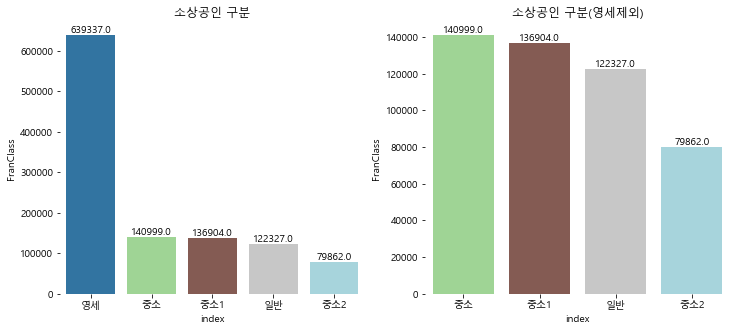

In [115]:
#단순 row수(의미없음)
temp = all_df.FranClass.value_counts()
temp = temp.reset_index()

#color
color_list = [plt.cm.tab20(c) for c in np.linspace(0.0, 1.0,5)]

plt.figure(figsize=(12,5))
#전체
ax1= plt.subplot(1,2,1)
ax1 = sns.barplot(x = 'index', y = 'FranClass', data= temp, palette = color_list)
for p in ax1.patches:
    ax1.annotate(p.get_height(), #출력될 숫자
               (p.get_x() + p.get_width() / 2., p.get_height()), #출력될 x,y위치
               ha = 'center', va = 'center', #중앙부에 오게끔
               xytext = (0, 5), #text가 출력될 위치 
               textcoords = 'offset points')
plt.box(False)
plt.title('소상공인 구분')
plt.ylable('구분')
plt

#영세제외
ax2= plt.subplot(1,2,2)
under = temp.loc[1:,:]
ax2 = sns.barplot(x = 'index', y = 'FranClass', data= under,palette = color_list[1:])
for p in ax2.patches:
    ax2.annotate(p.get_height(), #출력될 숫자
               (p.get_x() + p.get_width() / 2., p.get_height()), #출력될 x,y위치
               ha = 'center', va = 'center', #중앙부에 오게끔
               xytext = (0, 5), #text가 출력될 위치 
               textcoords = 'offset points')
plt.box(False)
plt.title('소상공인 구분(영세제외)')
plt.show()

In [8]:
os.getcwd()

'D:\\Python\\Git project\\jeju_visual'